### PBIL algorithm

In [148]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [149]:
#cost functions
def OneMax(v):
    return sum(v)
    
def Deceptive_OneMax(v):
    s = sum(v)
    if s > 0:
        return s
    return len(v) + 1

def K_Deceptive_OneMax(v, k=25):
    ans = 0
    for i in range(k, len(v) + 1, k):
        ans += Deceptive_OneMax(v[i - k:i])
    return ans

In [150]:
def Binary_Random(p):
    if random.uniform(0,1) < p:
        return 1
    return 0
def Random_Population(p,N,d):
    ans = [] # population
    for i in range(N):
        #adding random individuals
        ans.append([Binary_Random(p[j]) for j in range(d)])
    return ans
def evaluate_pop(pop,F):
    best_i = pop[-1]
    best_score = F(pop[-1])
    worst_score = F(pop[-1])
    mean_score = F(pop[-1])
    for i in range(len(pop) - 1):
        cost = F(pop[i])
        if cost > best_score:
            best_i = pop[i]
            best_score = cost
        if cost < worst_score:
            worst_score = cost
        mean_score += cost
    return best_i,best_score,worst_score,mean_score/len(pop)
    
def PBIL(d,F,N,T1,T2,T3,it):
    prob = [0.5 for i in range(d)]
    pop = Random_Population(prob,N,d)
    #data colected every iteration
    data = np.zeros((3,it)) # matrix of [b_score, m_score, w_score]
    probabilities = []

    for i in range(it):
        scores = evaluate_pop(pop,F)
        x = scores[0]
        probabilities.append(prob.copy())
        #print(prob)
        for j in range(len(scores) - 1):
            data[j][i] = scores[j + 1]
        for k in range(d):
            #learning
            prob[k] = prob[k] * (1 - T1) + x[k] * T1
        for k in range(d):
            #mutating
            if random.uniform(0,1) < T2:
                prob[k] = prob[k] * (1 - T3) + Binary_Random(0.5) * T3
        pop = Random_Population(prob,N,d)
        
    return data,probabilities
        

In [151]:
def plot(arg, data, probabilities):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle(arg)
    ax1.set_title('Probabilities')
    ax2.set_title('Costs')
    ax1.plot(probabilities)
    ax2.plot(data[0], label="Top scores")
    ax2.plot(data[2], label="Mean scores")
    ax2.plot(data[1], label="Worst scores")
    ax2.legend(loc='lower right')
    plt.show()

#### Results for different cost functions

In [152]:
arguments = [[100, OneMax, 125, 0.01, 0.05, 0.01, 1000, "OneMax"],[1000, OneMax, 125, 0.01, 0.05, 0.01, 1000, "OneMax"],
             [100, OneMax, 125, 0.05, 0.1, 0.04, 1000, "OneMax"],[1000, OneMax, 125, 0.01, 0.02, 0.02, 1000, "OneMax"],
             [100, Deceptive_OneMax, 125, 0.01, 0.05, 0.01, 1000, "Deceptive_OneMax"],[1000, Deceptive_OneMax, 125, 0.01, 0.05, 0.01, 1000, "Deceptive_OneMax"],
             [100, Deceptive_OneMax, 125, 0.007, 0.1, 0.05, 1000, "Deceptive_OneMax"],[1000, Deceptive_OneMax, 125, 0.01, 0.02, 0.02, 1000, "Deceptive_OneMax"],
             [100, K_Deceptive_OneMax, 125, 0.01, 0.05, 0.01, 1000, "K_Deceptive_OneMax"],[1000, K_Deceptive_OneMax, 125, 0.01, 0.05, 0.01, 1000, "K_Deceptive_OneMax"],
             [100, K_Deceptive_OneMax, 175, 0.005, 0.1, 0.06, 1000, "K_Deceptive_OneMax"],[1000, K_Deceptive_OneMax, 125, 0.1, 0.05, 0.01, 1000, "K_Deceptive_OneMax"],
             [100, K_Deceptive_OneMax, 225, 0.005, 0.15, 0.09, 1000, "K_Deceptive_OneMax"],[1000, K_Deceptive_OneMax, 125, 0.01, 0.1, 0.05, 1000, "K_Deceptive_OneMax"],]

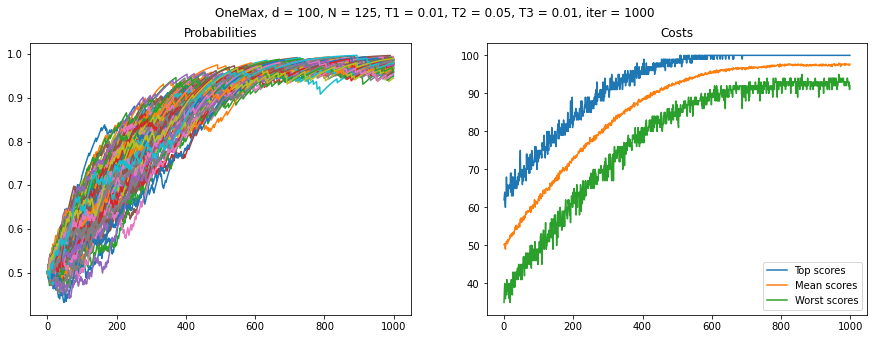

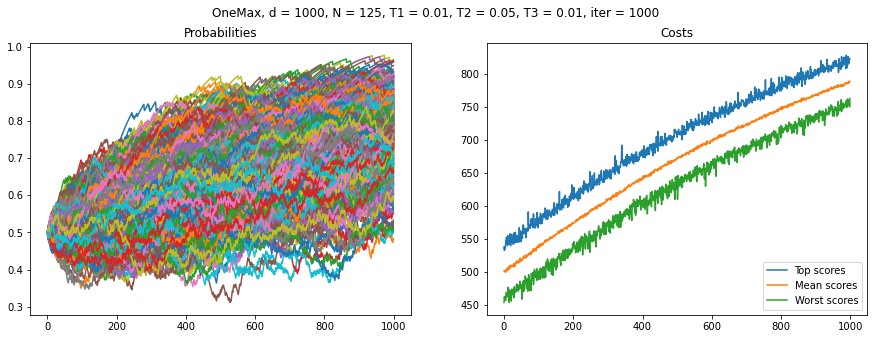

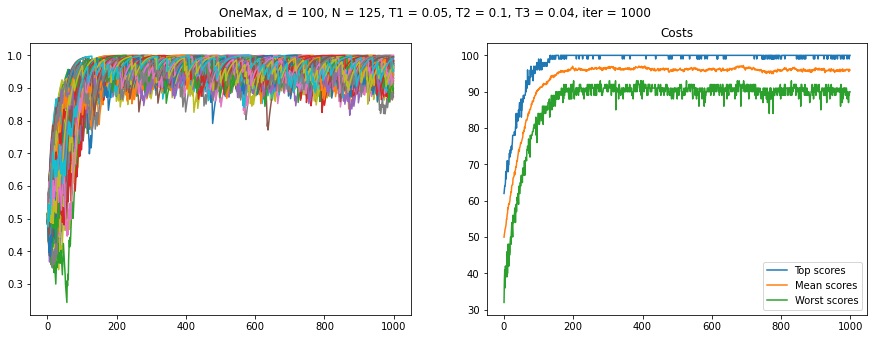

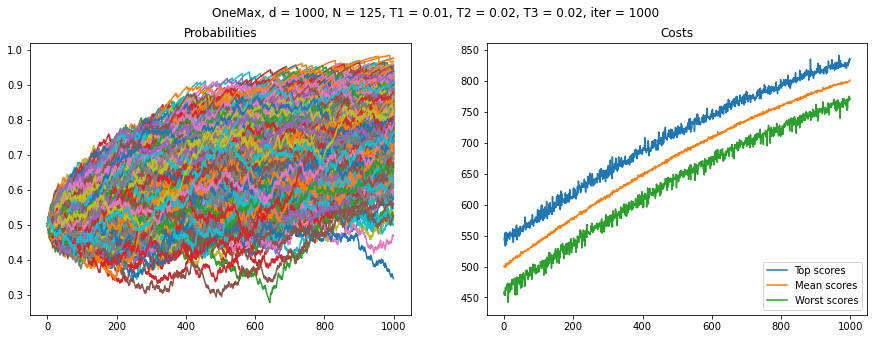

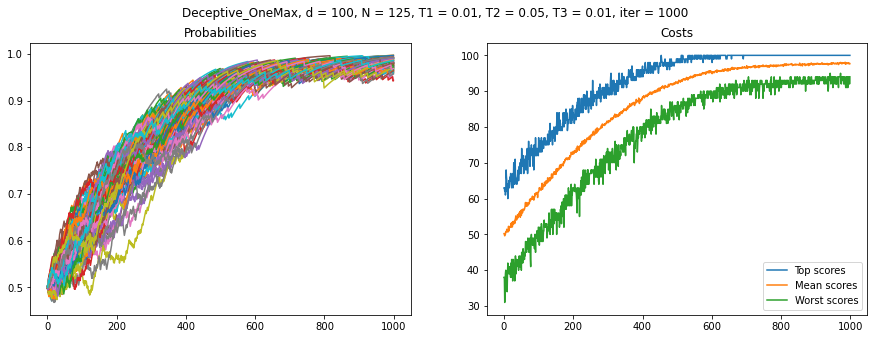

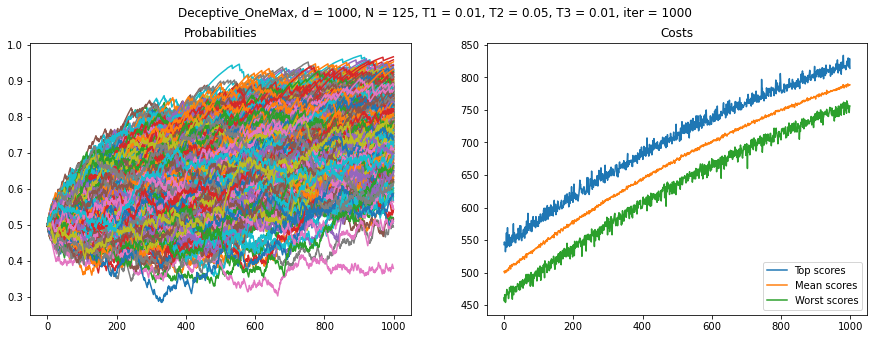

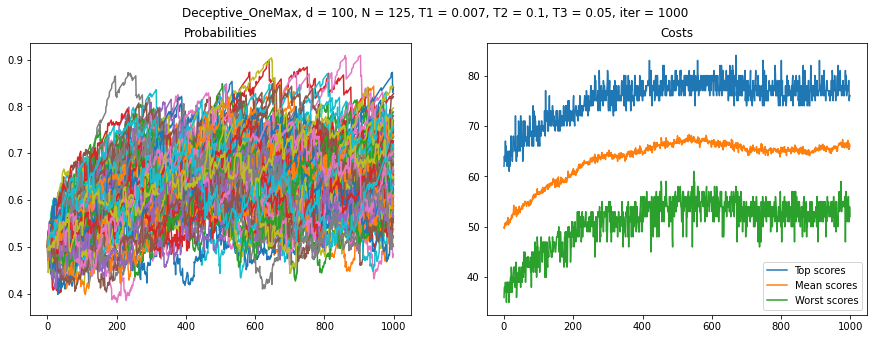

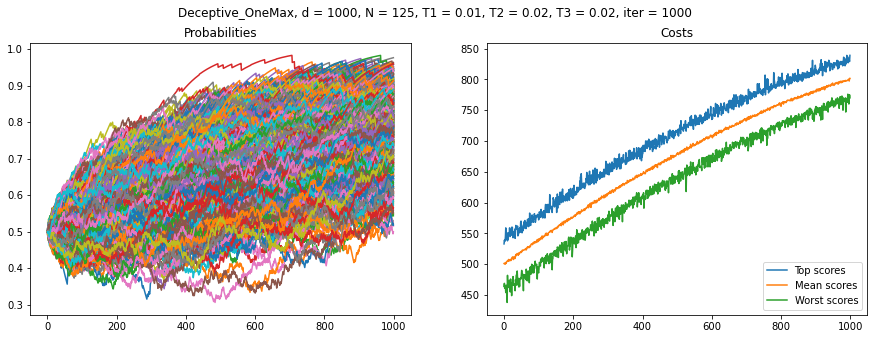

In [157]:
for a in arguments[:8]:
    data,probabilities = PBIL(*a[:-1])
    d,func,N,T1,T2,T3,it,name = a
    arg = f'{name}, d = {d}, N = {N}, T1 = {T1}, T2 = {T2}, T3 = {T3}, iter = {it}'
    plot(arg, data, probabilities)

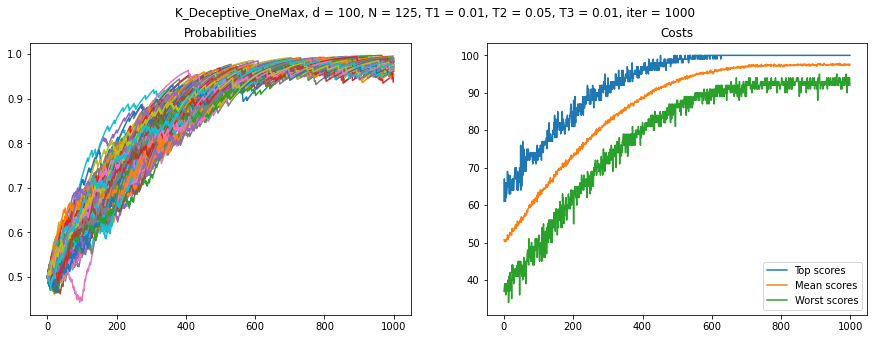

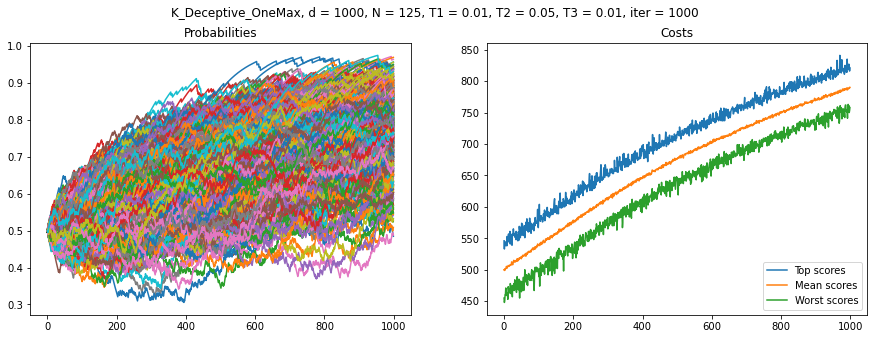

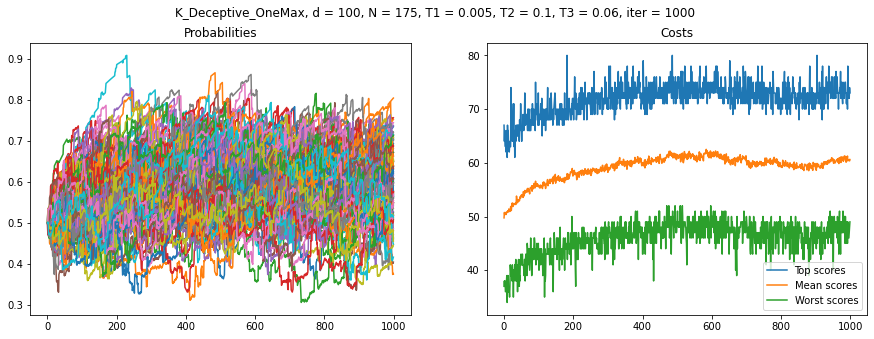

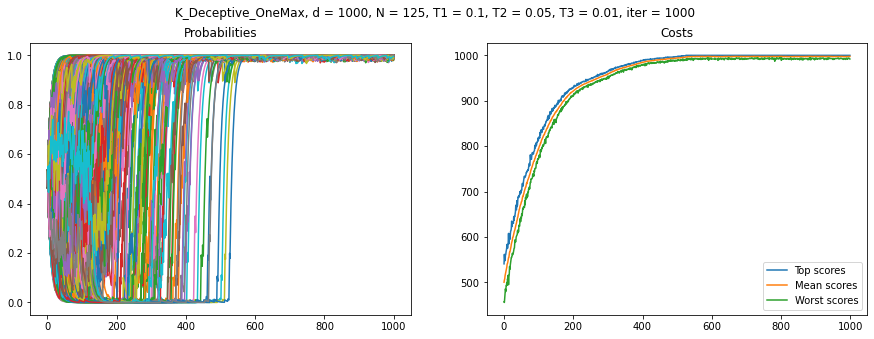

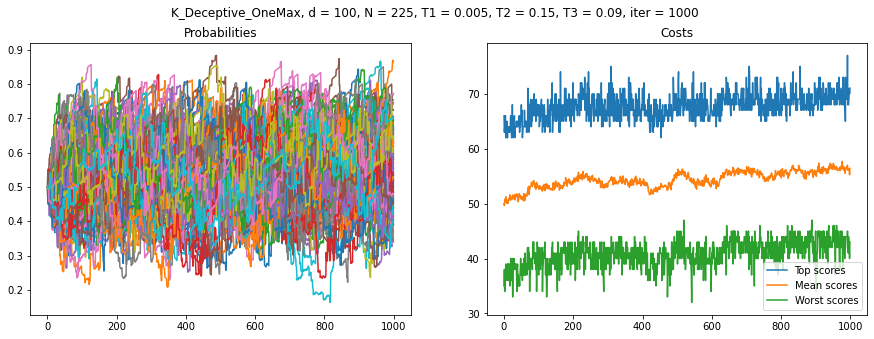

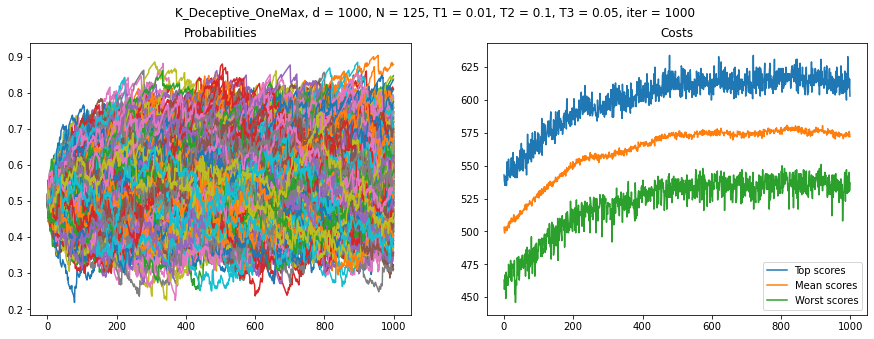

In [154]:
for a in arguments[8:]:
    data,probabilities = PBIL(*a[:-1])
    d,func,N,T1,T2,T3,it,name = a
    arg = f'{name}, d = {d}, N = {N}, T1 = {T1}, T2 = {T2}, T3 = {T3}, iter = {it}'
    plot(arg, data, probabilities)

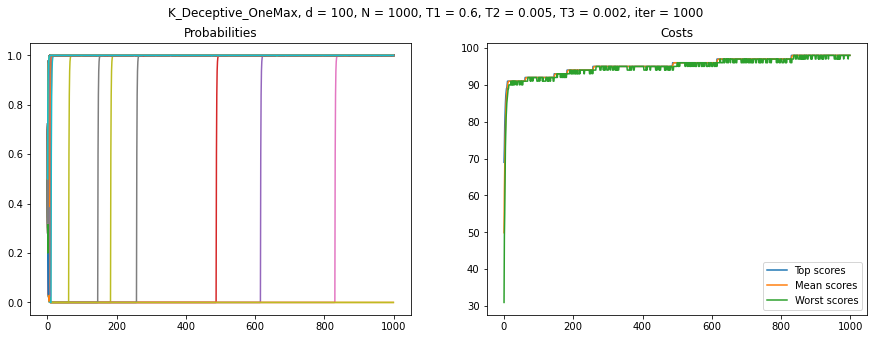

98.0


In [156]:
a = [100, K_Deceptive_OneMax, 1000, 0.6, 0.005, 0.002, 1000, "K_Deceptive_OneMax"]
data,probabilities = PBIL(*a[:-1])
d,func,N,T1,T2,T3,it,name = a
arg = f'{name}, d = {d}, N = {N}, T1 = {T1}, T2 = {T2}, T3 = {T3}, iter = {it}'
plot(arg, data, probabilities)
print(max(data[0]))